<a href="https://colab.research.google.com/github/skvball/Pro-Activism/blob/master/Parkinsons_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview:
1. Load data
2. Get the features and labels
3. Scale the features
4. Split the dataset
5. Build an XGBClassifier
6. Calculate the accuracy of our model.


In [ ]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Parkinson_Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Parkinson_Project


In [ ]:
infile = open('parkinsons.data.fasta')

dataa = [[]]
for line in infile:
  dataa.append(line.split(","))

cols = np.array(dataa[1])
dataa.pop(0)
dataa.pop(0)
dataa = np.array(dataa)

df = pd.DataFrame(data=dataa, columns=cols)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE\n
0,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654\n
1,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674\n
2,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634\n
3,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975\n
4,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335\n


In [ ]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [ ]:
zero = 0
one = 0
for status in labels:
  if status=="0":
    zero = zero+1
  else:
    one = one+1
print(one, zero)

147 48


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(features)
y = labels

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9487179487179487


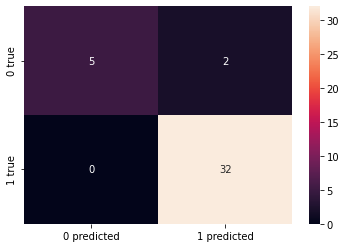

In [ ]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_mat.columns = [c + ' predicted' for c in model.classes_]
confusion_mat.index = [c + ' true' for c in model.classes_]

sn.heatmap(confusion_mat, annot=True)
plt.show()
